# 02_analysis.ipynb

In [1]:
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from platform import python_version
pd.set_option('display.precision',2)
import warnings
warnings.filterwarnings('ignore')
print(f'Python {python_version()}, Pandas {pd.__version__}, NumPy {np.__version__},sklearn{sklearn.__version__}')

Python 3.9.7, Pandas 2.2.3, NumPy 2.0.2,sklearn1.6.1


### Setup Figures Font Size

In [2]:
plt.rcParams.update({
    'font.size': 14,             
    'axes.titlesize': 16,          
    'axes.labelsize': 14,     
    'xtick.labelsize': 12,       
    'ytick.labelsize': 12,        
    'legend.fontsize': 12,        
})

## 2.1 Data Overview

|Variable|Type|Description|
|-|-|-|
Clientnum|	Num|	Client number. Unique identifier for the customer holding the account
Attrition_Flag|	Char|	Internal event (customer activity) variable - if the account is closed then 1 else 0
Customer_Age|	Num|	Demographic variable - Customer's Age in Years
Gender|	Char|	Demographic variable - M=Male, F=Female
Dependent_count|	Num|	Demographic variable - Number of dependents
Education_Level|	Char|	Demographic variable - Educational Qualification of the account holder </br> (example: high school, college graduate, etc.)
Marital_Status|	Char|	Demographic variable - Married, Single, Unknown
Income_Category|	Char|	Demographic variable - Annual Income Category of the account holder </br>(< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
Card_Category|	Char|	Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
Months_on_book|	Num|	Months on book (Time of Relationship)
Total_Relationship_Count|	Num|	Total no. of products held by the customer
Months_Inactive_12_mon|	Num|	No. of months inactive in the last 12 months
Contacts_Count_12_mon|	Num|	No. of Contacts in the last 12 months
Credit_Limit|	Num|	Credit Limit on the Credit Card
Total_Revolving_Bal|	Num|	Total Revolving Balance on the Credit Card
Avg_Open_To_Buy|	Num|	Open to Buy Credit Line (Average of last 12 months)
Total_Amt_Chng_Q4_Q1|	Num|	Change in Transaction Amount (Q4 over Q1) 
Total_Trans_Amt|	Num|	Total Transaction Amount (Last 12 months)
Total_Trans_Ct|	Num|	Total Transaction Count (Last 12 months)
Total_Ct_Chng_Q4_Q1|	Num|	Change in Transaction Count (Q4 over Q1) 
Avg_Utilization_Ratio|	Num|	Average Card Utilization Ratio


### Read Train data and Test data from CSV

In [3]:
df_train = pd.read_csv('../data/bank_churners_train.csv', index_col=0)
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

df_test = pd.read_csv('../data/bank_churners_test.csv', index_col=0)
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

### Check Training set 

In [4]:
print('X and y shapes:')
print(X_train.shape,y_train.shape,'\n')
print('Target Ratio:')
print(y_train.value_counts(normalize=True, dropna=False),'\n')
df_train.info()

X and y shapes:
(8101, 19) (8101,) 

Target Ratio:
Attrited_Customer
False    0.84
True     0.16
Name: proportion, dtype: float64 

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 6364 to 412
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   fl

The training dataset includes 8,101 samples with 19 features after data cleaning and preprocessing.
### Check Testing set 

In [5]:
print('X and y shapes:')
print(X_test.shape,y_test.shape,'\n')
print('Target Ratio:')
print(y_test.value_counts(normalize=True, dropna=False),'\n')
df_test.info()

X and y shapes:
(2026, 19) (2026,) 

Target Ratio:
Attrited_Customer
False    0.84
True     0.16
Name: proportion, dtype: float64 

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 5864 to 9700
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              2026 non-null   int64  
 1   Gender                    2026 non-null   object 
 2   Dependent_count           2026 non-null   int64  
 3   Education_Level           2026 non-null   object 
 4   Marital_Status            2026 non-null   object 
 5   Income_Category           2026 non-null   object 
 6   Card_Category             2026 non-null   object 
 7   Months_on_book            2026 non-null   int64  
 8   Total_Relationship_Count  2026 non-null   int64  
 9   Months_Inactive_12_mon    2026 non-null   int64  
 10  Contacts_Count_12_mon     2026 non-null   int64  
 11  Credit_Limit              2026 non-null   f

The testing dataset includes 2,026 samples with 19 features after data cleaning and preprocessing.

## 2.2 Churn Distribution

Understanding the distribution of the target variable (`Attrited_Customer`) is crucial before proceeding with modeling. Severe class imbalance can lead to biased models. Therefore, we first inspect the class balance between attrited and existing customers in the training dataset.

In [6]:
print("Churn Distribution (Counts):")
display(y_train.value_counts())

Churn Distribution (Counts):


Attrited_Customer
False    6799
True     1302
Name: count, dtype: int64

### Check Classes Percentage


Churn Distribution (Percentage):


Attrited_Customer
False    83.93
True     16.07
Name: proportion, dtype: float64

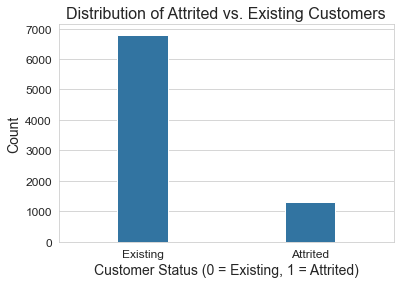

In [7]:
print("\nChurn Distribution (Percentage):")
display(y_train.value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
sns.countplot(x=y_train,width=0.3)
plt.title('Distribution of Attrited vs. Existing Customers')
plt.xlabel('Customer Status (0 = Existing, 1 = Attrited)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Existing', 'Attrited'])
plt.show()

**Observation:** The dataset shows that approximately 16% of customers have attrited, while 84% are existing customers. This indicates a moderate class imbalance, which will be considered during model development.

## 2.3 Feature Distributions
To better understand the characteristics of the dataset, we examine the distribution of selected numerical and categorical features. Identifying skewness, outliers, and potential class imbalance within features can inform feature engineering and model selection strategies.

### Numerical Features Distribution

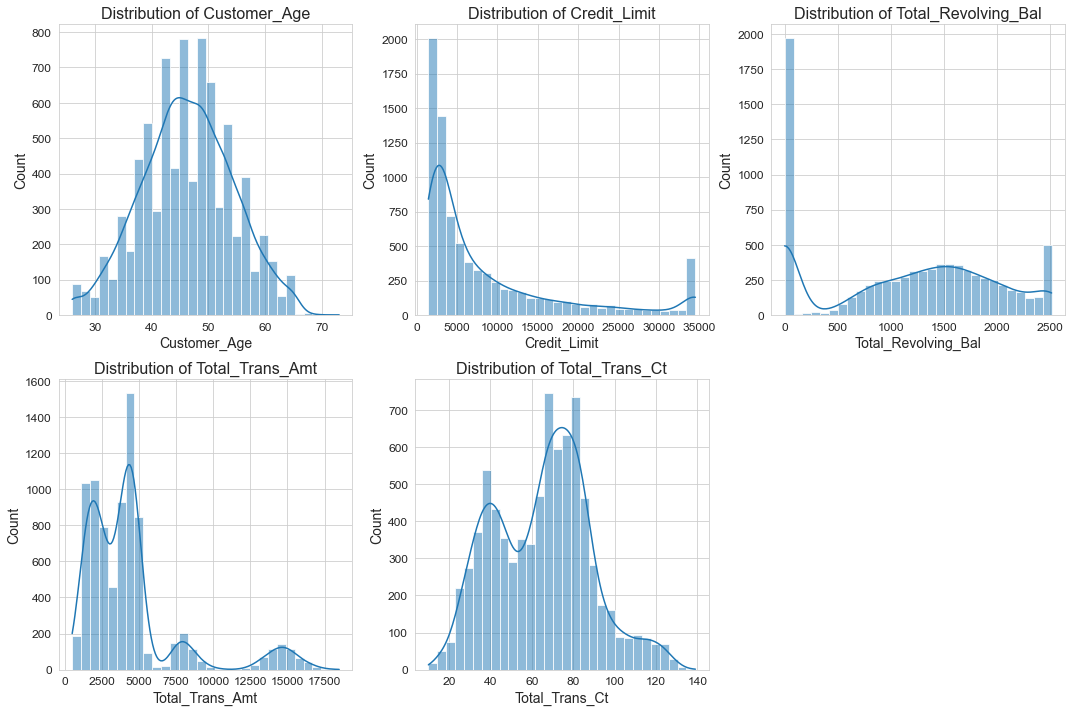

In [8]:
num_features = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### Categorical Features Distribution

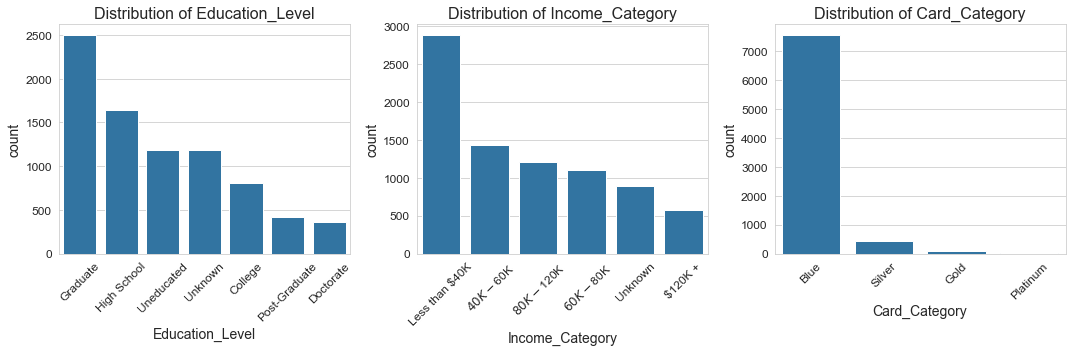

In [9]:
cat_features = ['Education_Level', 'Income_Category', 'Card_Category']

plt.figure(figsize=(15,5))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=X_train[feature], order=X_train[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** Features like `Total_Trans_Ct` and `Total_Trans_Amt` show right-skewed distributions, suggesting that most customers have relatively low transaction counts and amounts. Categorical features such as `Education_Level` and `Income_Category` are also imbalanced across different groups.

## 2.4 Churn vs Features

To further explore the relationship between customer attributes and attrition, we analyze how selected numerical and categorical features vary across churned and retained customers. Identifying distinct patterns can help select meaningful predictors for modeling.

### Numerical Features vs Churn

We examine the distribution of selected numerical features across churned and existing customers using boxplots. Significant differences between the groups may suggest strong predictive power for those features.

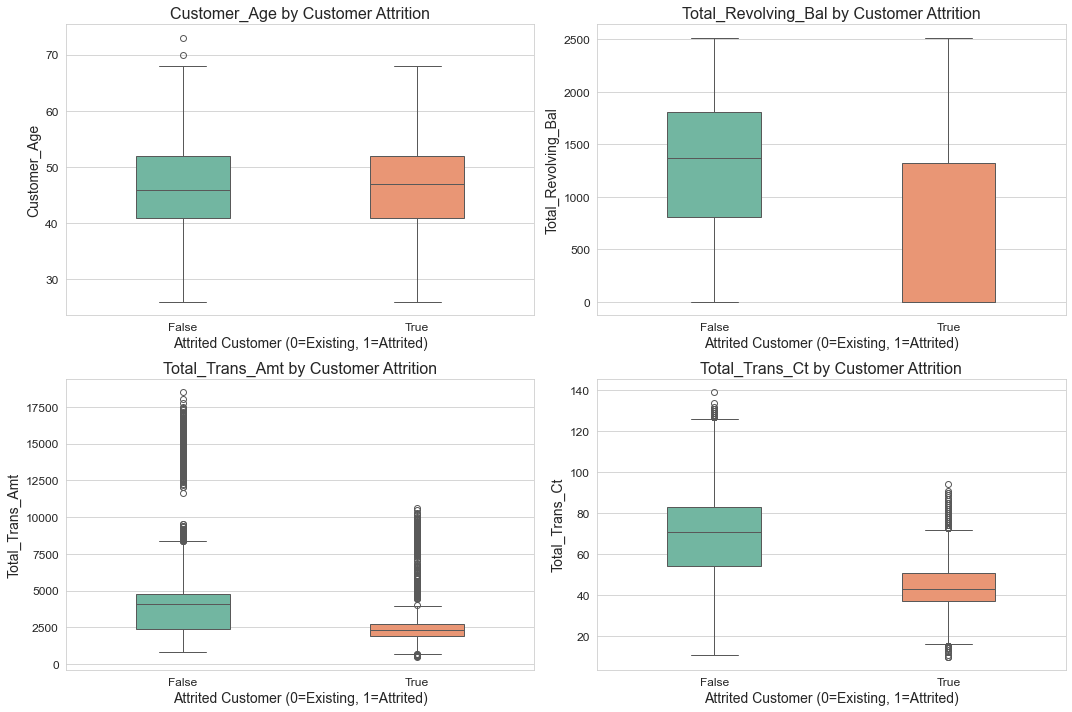

In [10]:
num_features = ['Customer_Age', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=y_train, y=X_train[feature],width=0.4,palette="Set2")
    plt.title(f'{feature} by Customer Attrition')
    plt.xlabel('Attrited Customer (0=Existing, 1=Attrited)')
    plt.ylabel(feature)
plt.tight_layout()
plt.palette="Set2"
plt.show()

**Observation:**
- **Customer_Age**: There is no significant difference in the age distribution between existing and attrited customers.
- **Total_Revolving_Bal**: Attrited customers tend to have a slightly lower revolving balance compared to existing customers, although the difference is not drastic.
- **Total_Trans_Amt**: Attrited customers show a notably lower total transaction amount compared to existing customers, indicating reduced engagement before attrition.
- **Total_Trans_Ct**: Similarly, attrited customers have significantly fewer total transactions, suggesting that lower transaction activity could be a strong indicator of churn.

### Categorical Features vs Churn

We explore how the proportions of attrited and existing customers differ across categorical features by plotting stacked bar charts. Features showing notable differences may serve as good predictors for churn.

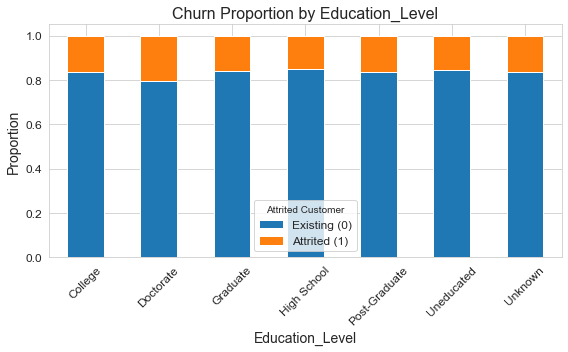

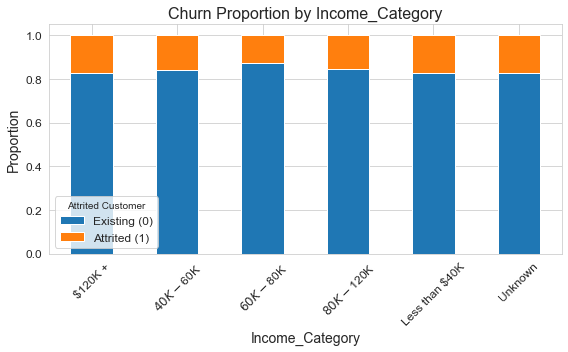

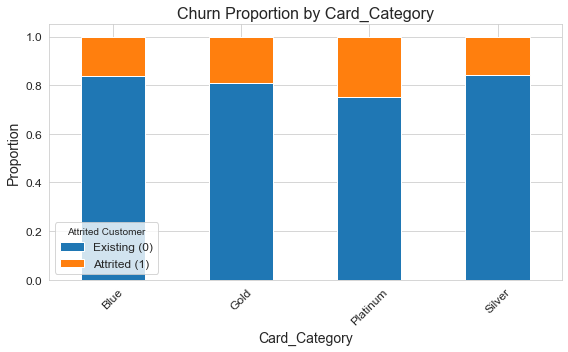

In [11]:
cat_features = ['Education_Level', 'Income_Category', 'Card_Category']

for feature in cat_features:
    ct = pd.crosstab(X_train[feature], y_train, normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(f'Churn Proportion by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Attrited Customer', labels=['Existing (0)', 'Attrited (1)'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Observation:**
- **Education_Level**: Attrition rates appear fairly consistent across different education levels, suggesting that education may not be a strong predictor of churn.
- **Income_Category**: Customers in the lower income brackets show a slightly higher proportion of attrition compared to higher income groups, indicating a potential influence of income level on customer retention.
- **Card_Category**: Customers holding lower-tier cards (such as "Blue" cards) tend to have higher attrition rates compared to those with premium cards, suggesting that card type and associated benefits may impact customer loyalty.

## 2.5 Correlation Analysis

We analyze the correlations among numerical features to identify highly correlated variables and detect potential multicollinearity issues. Additionally, we examine how each feature individually correlates with the target variable (`Attrited_Customer`) to identify strong predictors for churn.
### Feature Correlation Heatmap

The heatmap below shows the Pearson correlation coefficients between numerical features in the training dataset. Darker colors indicate stronger correlations.

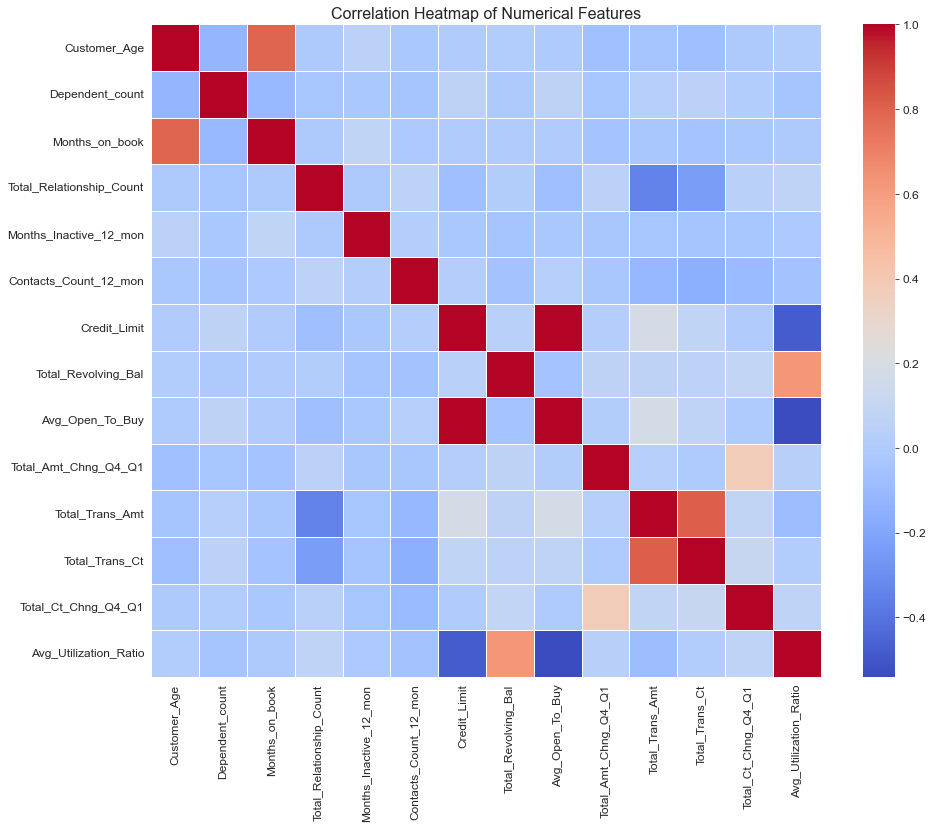

In [12]:
num_cols = X_train.select_dtypes(include=np.number).columns

# correlation matrix
corr_matrix = X_train[num_cols].corr()

# plot the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(
    corr_matrix, 
    annot=False, 
    cmap='coolwarm', 
    linewidths=0.5,
    cbar=True
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

### Feature vs Target Correlation

The following table shows the Pearson correlation coefficients between each numerical feature and the target variable (`Attrited_Customer`), sorted by absolute correlation strength.

In [13]:
target_corr = X_train[num_cols].corrwith(y_train).sort_values(key=lambda x: abs(x), ascending=False)

display(target_corr.to_frame(name='Correlation with Attrited_Customer'))

,Correlation with Attrited_Customer
Total_Trans_Ct,-3.69e-01
Total_Ct_Chng_Q4_Q1,-2.92e-01
Total_Revolving_Bal,-2.67e-01
Contacts_Count_12_mon,2.04e-01
Avg_Utilization_Ratio,-1.79e-01
Total_Trans_Amt,-1.69e-01
Months_Inactive_12_mon,1.56e-01
Total_Relationship_Count,-1.51e-01
Total_Amt_Chng_Q4_Q1,-1.34e-01
Credit_Limit,-2.42e-02


**Observation:**
- Several numerical features exhibit strong positive correlations with each other. For example, features like `Total_Trans_Ct` and `Total_Trans_Amt` show a high degree of correlation, indicating that customers who transact more frequently also tend to have higher total transaction amounts.
- High correlations are also observed between some revolving balance and credit limit related features.
- Negative correlations, although weaker, are visible between certain features such as `Total_Revolving_Bal` and `Total_Trans_Amt`, suggesting that customers with higher transaction amounts tend to have lower revolving balances.
- The presence of highly correlated feature pairs suggests potential multicollinearity, which should be carefully addressed during feature selection or through dimensionality reduction techniques in the modeling phase.

## 2.6 EDA Key Findings

- **Churn Distribution:** Approximately 16% of customers have attrited, indicating a moderate class imbalance that should be considered during model development.
- **Numerical Feature Insights:** Attrited customers tend to have significantly lower total transaction counts and transaction amounts compared to existing customers, suggesting that customer engagement levels are strong indicators of attrition.
- **Categorical Feature Insights:** Income category and card category show noticeable differences in churn proportions, whereas education level appears to have minimal influence.
- **Feature Correlations:** Strong positive correlations are observed between transactional features such as `Total_Trans_Ct` and `Total_Trans_Amt`. Some negative correlations exist between transaction activity and revolving balance.
- **Multicollinearity Considerations:** The presence of highly correlated features may necessitate feature selection or dimensionality reduction techniques to avoid multicollinearity issues during modeling.
- **Feature Selection for Modeling:** Based on EDA findings, features related to customer transaction activity, contact frequency, and income levels are expected to be particularly valuable for predictive modeling.

These findings will directly inform the feature selection and model development in the next phase.
